# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Incep prin a ma uita la date, verific structura lor, tipul de variabile care exista
data.shape

(32561, 15)

In [4]:
data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
#sterg variabila categoriala education - exista o coloana numerica education-num care imi da aceeasi informatie -> evit redundanta datelor
del data['education']

In [7]:
#voi sterge final weight, pentru ca nu il pot folosi ca feature in viitoarea analiza de regresie, nu aduce informatii noi despre target

del data['fnlwgt']

In [8]:
#Verific daca exista missing values + fac o suma a lor. In cazul in care exista null-uri, decid daca merita sa pastrez o variabila sau nu.

data.isnull().sum()

#In cazul de fata nu exista NA-uri (suma = 0 pe fiecare rand), deci pot merge mai departe.

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#ma uit la erori, incosistencies in data

for col in data.columns:
    print(f"Coloana {col} valori unice: {data[col].unique()}")


#observ ca am valori ? la workclass si occupation + native-country

Coloana age valori unice: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Coloana workclass valori unice: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Coloana education-num valori unice: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Coloana marital-status valori unice: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Coloana occupation valori unice: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Coloana relationship valori unice: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unma

In [11]:
#numar valorile ?


cols = ['workclass', 'occupation', 'native-country']

for col in cols:
    count = (data[col].astype(str).str.strip() == '?').sum()
    print(f"Coloana {col} are {count} valori '?'")


#decid sa sterg randurile cu valori ? -> iseamna un total de cca. 6% din datele mele, considerand ca am 32561 randuri in df-ul original

Coloana workclass are 1836 valori '?'
Coloana occupation are 1843 valori '?'
Coloana native-country are 583 valori '?'


In [12]:
#sterg valorile ? din workclass si occupation

data = data[data['workclass'] != '?'].copy()
data = data[data['occupation'] != '?'].copy()

#pentru native-country, pentru ca are multe clase, voi reduce numarul de clase la 10 + Other (voi include in Other valorile cu ?)

In [13]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# adaug ? in categoria Other + grupez valorile din native-country dupa frecventa

top_countries = data['native-country'].value_counts().head(10).index
top_countries = [c for c in top_countries if c != '?']  # ← Exclude ?


data['native-country'] = data['native-country'].apply(
    lambda x: x if (x in top_countries and x != '?') else 'Other'
)

print(data['native-country'].value_counts())


native-country
United-States    27504
Other             1780
Mexico             610
Philippines        188
Germany            128
Puerto-Rico        109
Canada             107
India              100
El-Salvador        100
Cuba                92
Name: count, dtype: int64


In [15]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Other', 'India', 'Mexico', 'Puerto-Rico',
       'Canada', 'Germany', 'Philippines', 'El-Salvador'], dtype=object)

In [16]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [17]:
#afisam randurile duplicate

print(f'Numar duplicate {data.duplicated().sum()}')

#in cazul de fata nu voi sterge duplicatele acum -> ma gandesc ca este vorba de persoane cu profil similar

Numar duplicate 3269


In [18]:
data.shape

(30718, 13)

In [19]:
#elimin spatii goale din numele coloanelor

data.columns = data.columns.str.strip()

        

In [20]:
#elimin spatii goale din valorile string

data[data.select_dtypes(include="object").columns] = (
    data.select_dtypes(include="object")
        .apply(lambda col: col.str.strip())
)


In [21]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [23]:
# feature creation


#castigul net de capital - ramane variabila continua, va fi nevoie de standardizare/normalizare

data['net_capital'] = data['capital-gain'] - data['capital-loss']

#age-group - variabila categoriala -> voi utiliza ordinal encoding

data['age_group'] = pd.cut(
        data['age'],
        bins=[0, 25, 35, 50, 65, 100],
        labels=['young', 'young_adult', 'middle_aged', 'senior', 'elderly'],
        include_lowest=True
    )


#education_level -> ordinal encoding

def education_level(num):
    if num <= 6:
        return 'Low'
    elif num <= 12:
        return 'Medium'
    else:
        return 'High'

data['education_level'] = data['education-num'].apply(education_level)



data = data.drop(['capital-gain', 'capital-loss', 'age', 'education-num'], axis=1)

#######################################################




In [24]:
data['marital-status'].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [25]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [26]:
#voi sterge coloana relatioship, imi da aproape aceeasi informatie ca marital-status, voi pastra doar marital-status (are mai multe clase)

del data['relationship']

In [27]:
data['net_capital'].unique()

array([ 2174,     0, 14084,  5178, -2042, -1408, -1902,  5013,  2407,
       14344, -1573, 15024,  7688, -1887,  4064, -1719, -1762,  4386,
       -1564, -2179, -1816, -1980, -1977,  7298, -1876, -1340, -2206,
        1409,  3674, -1741,  1055, -1485,  2050, -2339, -2415,  2176,
         594, -1380, 20051,  6849,  4101,  8614,  3411, -1721,  2597,
       25236, -2051,  4650,  9386, -2377, -1669, -2352,  2463,  3103,
       -1672,  -653, 10605, -2392,  2964,  3325, -1504,  2580,  3471,
       -1590, -1651,  4865, 99999,  6514, -1628,  1471,  2329, -1848,
        2105, -2001,  2885, 10520, -1740,  2202, -2002,  2961, 27828,
        6767,  2228, -1579,  1506, 13550,  2635, -2258,  5556, -1602,
        4787,  3781,  3137, -2547,  3818,   914,   401,  2829,  2977,
        4934, -2205, -1726, -2444,  2062, -1138, -2238,  2354,  3464,
        5455, 15020,  1424,  -625,  3273, 22040,  -213,  4416, 10566,
        4931, -1539,  -880,  7430, 34095,  6497,  3908,   114, -1668,
        7896,  2346,

<Axes: >

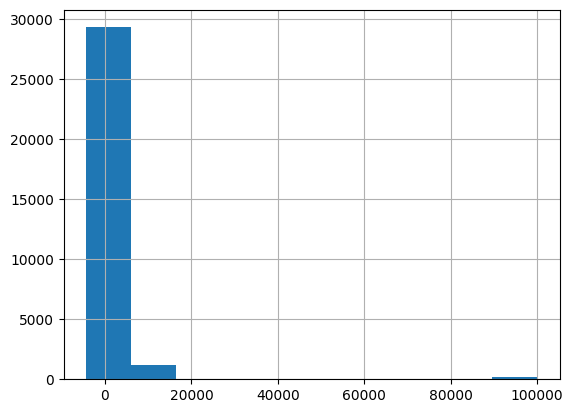

In [28]:
data['net_capital'].hist()

In [29]:
data.age_group.unique()

['middle_aged', 'senior', 'young_adult', 'young', 'elderly']
Categories (5, object): ['young' < 'young_adult' < 'middle_aged' < 'senior' < 'elderly']

In [30]:
data.head()

,workclass,marital-status,occupation,race,sex,hours-per-week,native-country,income,net_capital,age_group,education_level
0,State-gov,Never-married,Adm-clerical,White,Male,40,United-States,<=50K,2174,middle_aged,High
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K,0,middle_aged,High
2,Private,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K,0,middle_aged,Medium
3,Private,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K,0,senior,Medium
4,Private,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K,0,young_adult,High


In [31]:
print(data['hours-per-week'])

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours-per-week, Length: 30718, dtype: int64


<Axes: >

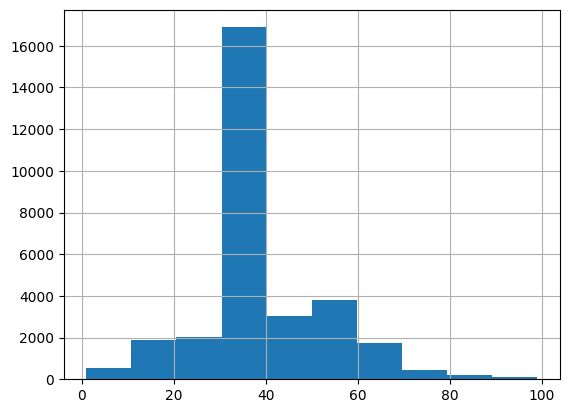

In [32]:
#histograma target

data['hours-per-week'].hist()

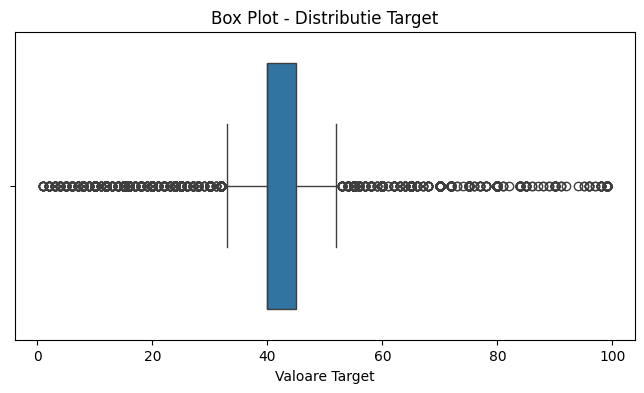

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['hours-per-week'])
plt.title('Box Plot - Distributie Target')
plt.xlabel('Valoare Target')
plt.show()

#hisograma si box plotul arata o concentrare mare in jurul valorii de 40 ore/saptamana (mediana).
#Foarte multi outliers in dreapta (aprox 60-100h/saptamana lucrate) si stanga (cazuri sub 35h/saptamana lucrate)
#Distributie puternic asimetrica -> va trebui sa tratez outlierii pe target

In [34]:
data.head()

,workclass,marital-status,occupation,race,sex,hours-per-week,native-country,income,net_capital,age_group,education_level
0,State-gov,Never-married,Adm-clerical,White,Male,40,United-States,<=50K,2174,middle_aged,High
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K,0,middle_aged,High
2,Private,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K,0,middle_aged,Medium
3,Private,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K,0,senior,Medium
4,Private,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K,0,young_adult,High


STATISTICI DESCRIPTIVE
        net_capital
count  30718.000000
mean    1017.126864
std     7521.914330
min    -4356.000000
25%        0.000000
50%        0.000000
75%        0.000000
max    99999.000000


DETECTARE OUTLIERI - METODA IQR

 NET_CAPITAL
   Q1 (25%): 0.00
   Q3 (75%): 0.00
   IQR: 0.00
   Lower bound: 0.00
   Upper bound: 0.00
   Număr outlieri: 4050 (13.18%)
>10% outlieri - distributie skewed




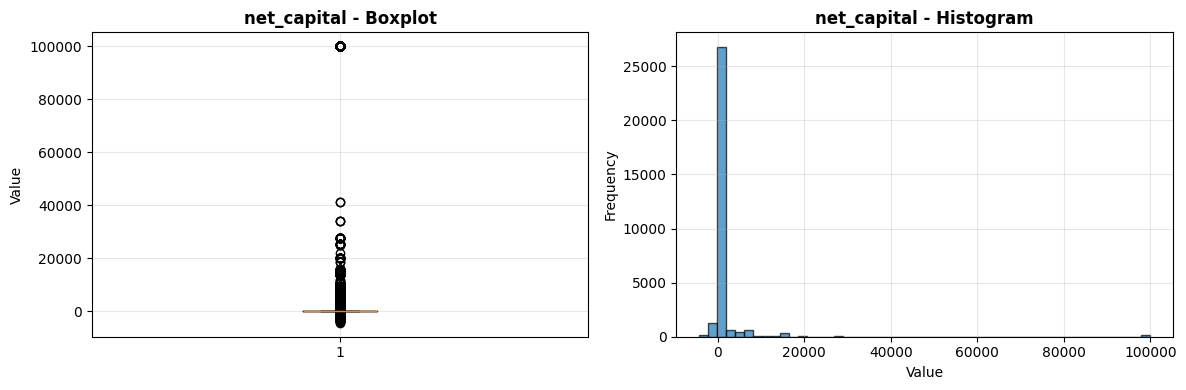

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols_to_check = ['net_capital']  


#statistici descriptive 


print("STATISTICI DESCRIPTIVE")

print(data[numerical_cols_to_check].describe())
print("\n")


# detectare outlieri cu metoda IQR

print("DETECTARE OUTLIERI - METODA IQR")

for col in numerical_cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(data)) * 100
    

    print(f"\n {col.upper()}")
    print(f"   Q1 (25%): {Q1:.2f}")
    print(f"   Q3 (75%): {Q3:.2f}")
    print(f"   IQR: {IQR:.2f}")
    print(f"   Lower bound: {lower_bound:.2f}")
    print(f"   Upper bound: {upper_bound:.2f}")
    print(f"   Număr outlieri: {n_outliers} ({pct_outliers:.2f}%)")
    
    if pct_outliers > 10:
        print(f">10% outlieri - distributie skewed")
    elif pct_outliers > 5:
        print(f">5% outlieri")
    elif pct_outliers > 0:
        print(f" outlieri normali (<5%)")
    else:
        print(f"nu sunt outlieri")

print("\n" + "="*80 + "\n")



# vizualizare outlieri


n_cols = len(numerical_cols_to_check)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 4*n_cols))
if n_cols == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols_to_check):
    # Boxplot
    axes[idx, 0].boxplot(data[col].dropna())
    axes[idx, 0].set_title(f'{col} - Boxplot', fontsize=12, fontweight='bold')
    axes[idx, 0].set_ylabel('Value')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Histogram
    axes[idx, 1].hist(data[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{col} - Histogram', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel('Value')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#distributie foarte skewed, sunt foarte putini oameni cu castig mare de capital, majoritatea valorilor sunt 0 dar sunt valori reale
#pastrez outlierii -> voi adauga in codul de preprocess RobustScaler, mai potrivit pentru regresia liniara


In [36]:
output_path = r"C:\Users\ASUS\Desktop\ADC 2\MACHINE LEARNING\cursuri_ml\data\org_data.csv"
data.to_csv(output_path, index=False)


In [37]:
# definirea coloanelor
target_col = 'hours-per-week'
num_cols = ['net_capital']
ordinal_cols = ['age_group', 'education_level']
cat_cols = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country', 'income']

feature_cols = num_cols + cat_cols + ordinal_cols

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,  
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline 


def get_preprocessor(use_ohe=True, use_norm=True, cat_cols=[], numerical_cols=[], ordinal_cols=[]):
    ohe_cols = [col for col in cat_cols if col not in ordinal_cols]
    
    transformers = []
    
    # Numerical transformer
    if numerical_cols:
        if use_norm == 'robust':
            scaler = RobustScaler()  
        elif use_norm == True:
            scaler = MinMaxScaler()  
        else:  
            scaler = StandardScaler()  
        num_steps = [
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler() if use_norm else StandardScaler)
        ]
        num_transformer = MinMaxScaler() if use_norm else StandardScaler()
        transformers.append(('num', num_transformer, numerical_cols))
    
    # Ordinal transformer
    if ordinal_cols:
        categories = []
        for col in ordinal_cols:
            if col == 'age_group':
                categories.append(['young', 'young_adult', 'middle_aged', 'senior', 'elderly'])
            elif col == 'education_level':
                categories.append(['Low', 'Medium', 'High'])
        ordinal_steps= [
            ('imputer', SimpleImputer(strategy='most frequent')),
            ('encoder', OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1))
        ]
        
        ordinal_transformer = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
        transformers.append(('ordinal', ordinal_transformer, ordinal_cols))
    
    # Categorical transformer
    if use_ohe:
        if ohe_cols:
            ohe_steps = [
                ('imputer', SimpleImputer(strategy='most frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
            ]
            ohe_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            transformers.append(('ohe', ohe_transformer, ohe_cols))
    
    preprocessor = ColumnTransformer(transformers=transformers)
    return preprocessor


def preprocess(data, target_col=None, mode='train', use_ohe=True, use_norm=True,
                categorical_cols=[], numerical_cols=[], ordinal_cols=[],
                use_valid=False, random_state=None, preprocessor=None):
    
    if mode == 'train':
        if target_col and data[target_col].isnull().sum() > 0:
            data=data.dropna(subset=[target_col])
    elif mode == 'test':
        pass
    
    if target_col:
        target = data[target_col]
        data = data.drop(target_col, axis=1)
    
    if mode == 'train':
        X_train, X_test, y_train, y_test = train_test_split(
            data, target, test_size=0.2, random_state=random_state
        )
        
        if use_valid:
            X_train, X_valid, y_train, y_valid = train_test_split(
                X_train, y_train, test_size=0.2, random_state=random_state
            )
        
        
        preprocessor = get_preprocessor(use_ohe, use_norm, categorical_cols, numerical_cols, ordinal_cols)
        X_train = preprocessor.fit_transform(X_train)
        X_test = preprocessor.transform(X_test)
        if use_valid:
            X_valid = preprocessor.transform(X_valid)
        
        if use_valid:
            return X_train, X_valid, X_test, y_train, y_valid, y_test, preprocessor
        return X_train, X_test, y_train, y_test, preprocessor
    
    elif mode == 'test':
        if preprocessor is None:
            raise ValueError('In test mode, preprocessor must be provided.')
        X_test = preprocessor.transform(data)
        return X_test

In [39]:
random_state = 10

# V1: OHE + MinMax
data_prep_v1 = preprocess(
    data, 
    target_col=target_col, 
    mode='train', 
    use_ohe=True, 
    use_norm=True, 
    categorical_cols=cat_cols, 
    numerical_cols=num_cols, 
    ordinal_cols=ordinal_cols,
    random_state=random_state
)

X_train_v1, X_test_v1, y_train_v1, y_test_v1, preprocessor_v1 = data_prep_v1

# V1 cu validation set
data_prep_v1_valid = preprocess(
    data, 
    target_col=target_col, 
    mode='train', 
    use_ohe=True, 
    use_norm=True, 
    categorical_cols=cat_cols, 
    numerical_cols=num_cols, 
    ordinal_cols=ordinal_cols,
    use_valid=True, 
    random_state=random_state
)

X_train_v1, X_valid_v1, X_test_v1, y_train_v1, y_valid_v1, y_test_v1, preprocessor_v1 = data_prep_v1_valid



# V2: OHE + StandardScaler
data_prep_v2 = preprocess(
    data, 
    target_col=target_col, 
    mode='train', 
    use_ohe=True, 
    use_norm=False, 
    categorical_cols=cat_cols, 
    numerical_cols=num_cols, 
    ordinal_cols=ordinal_cols,
    random_state=random_state
)

X_train_v2, X_test_v2, y_train_v2, y_test_v2, preprocessor_v2 = data_prep_v2

# V3: OHE + RobustScaler 
data_prep_v3 = preprocess(
    data, 
    target_col=target_col, 
    mode='train', 
    use_ohe=True, 
    use_norm='robust', 
    categorical_cols=cat_cols, 
    numerical_cols=num_cols, 
    ordinal_cols=ordinal_cols,
    random_state=random_state
)

X_train_v3, X_test_v3, y_train_v3, y_test_v3, preprocessor_v3 = data_prep_v3

In [40]:
#vizualizare
pd.DataFrame(data_prep_v1[0]).head()  # X_train_v1


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.041742,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.041742,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.041742,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.041742,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.041742,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
pd.DataFrame(data_prep_v2[0]).head() #x_train v2

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.134785,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.134785,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.134785,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.134785,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.134785,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
pd.DataFrame(data_prep_v3[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.041742,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.041742,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.041742,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.041742,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.041742,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
pd.DataFrame({target_col: y_train_v1})

,hours-per-week
11195,32
5820,60
21632,40
9386,35
10657,50
...,...
23726,40
31143,50
24353,40
5487,40


In [44]:
#functie pentru a extrage feature names

def get_feature_names_from_preprocessor(preprocessor, cat_cols, num_cols, ordinal_cols):
    feature_names = []
    
    feature_names.extend(num_cols)
    feature_names.extend(ordinal_cols)
    
    ohe_cols = [col for col in cat_cols if col not in ordinal_cols]
    if 'ohe' in [name for name, _, _ in preprocessor.transformers_]:
        ohe_transformer = preprocessor.named_transformers_['ohe']
        ohe_feature_names = ohe_transformer.get_feature_names_out(ohe_cols)
        feature_names.extend(ohe_feature_names)
    
    return feature_names



In [45]:
#transform seturile de date in csv - le-am incarcat in folderul 'Data'

feature_names_v3 = get_feature_names_from_preprocessor(preprocessor_v3, cat_cols, num_cols, ordinal_cols)

# TRAIN
train_df = pd.DataFrame(X_train_v3, columns=feature_names_v3)
train_df['hours-per-week'] = y_train_v3.values
train_df.to_csv('v3_train_preprocessed_robust.csv', index=False)


# TEST
test_df = pd.DataFrame(X_test_v3, columns=feature_names_v3)
test_df['hours-per-week'] = y_test_v3.values
test_df.to_csv('v3_test_preprocessed_robust.csv', index=False)




In [46]:
feature_names_v2 = get_feature_names_from_preprocessor(preprocessor_v2, cat_cols, num_cols, ordinal_cols)

#TRAIN
train_df2 = pd.DataFrame(X_train_v2, columns=feature_names_v2)
train_df2['hours-per-week'] = y_train_v2.values
train_df2.to_csv('v2_train_preprocessed_standard.csv', index=False)

#TEST
test_df2 = pd.DataFrame(X_test_v2, columns=feature_names_v2)
test_df2['hours-per-week'] = y_test_v2.values
train_df2.to_csv('v2_test_preprocessed_standard.csv', index=False)


In [47]:
feature_names_v1 = get_feature_names_from_preprocessor(preprocessor_v1, cat_cols, num_cols, ordinal_cols)

#TRAIN
train_df1 = pd.DataFrame(X_train_v1, columns=feature_names_v1)
train_df1['hours-per-week'] = y_train_v1.values
train_df1.to_csv('v1_train_preprocessed_minmax.csv', index=False)



#TEST
test_df1 = pd.DataFrame(X_test_v1, columns=feature_names_v1)
test_df1['hours-per-week'] = y_test_v1.values
test_df1.to_csv('v1_test_preprocessed_minmax.csv', index=False)
